# Wind data EDA

## Loading packages 

In [339]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Importing data

In [340]:
df_windmills = pd.read_csv('../data/Other/Cleaned_Windmolens_2021-2023.csv')
df_windmills

,Region,Year,Capacity Factor,Capacity (MW),Production (kWh),Wind Turbines
0,Drenthe (PV),2021,16.9,221.0,207.0,61.0
1,Drenthe (PV),2022,32.9,246.0,643.0,68.0
2,Drenthe (PV),2023,33.0,271.0,786.0,75.0
3,Flevoland (PV),2021,22.1,1285.0,2285.0,613.0
4,Flevoland (PV),2022,24.0,1584.0,3043.0,627.0
5,Flevoland (PV),2023,29.6,1992.0,4570.0,689.0
6,Fryslân (PV),2021,23.2,576.0,946.0,368.0
7,Fryslân (PV),2022,32.3,619.0,1679.0,370.0
8,Fryslân (PV),2023,35.3,619.0,1915.0,370.0
9,Gelderland (PV),2021,25.2,171.0,361.0,61.0


In [341]:
df_production = pd.read_csv('../data/ProductionData/cleaned_energie_opwek.csv')
df_production

,datetime,point,type,granularity,timezone,activity,classification,capacity,volume,percentage,emission,emissionfactor
0,2020-12-31 23:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,418750,418750,0.536859,125625,0.3
1,2021-01-01 00:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,416000,416000,0.533333,124800,0.3
2,2021-01-01 01:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,430250,430250,0.551602,129075,0.3
3,2021-01-01 02:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436750,436750,0.559936,131025,0.3
4,2021-01-01 03:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436000,436000,0.558974,130800,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
271579,2023-12-31 18:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3144000,3144000,1.431400,0,0.0
271580,2023-12-31 19:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3102250,3102250,1.412392,0,0.0
271581,2023-12-31 20:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3086249,3086249,1.405107,0,0.0
271582,2023-12-31 21:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3051749,3051749,1.389403,0,0.0


In [342]:
# Converting the 'datetime' column to a datetime object to extract the year
df_production['year'] = pd.to_datetime(df_production['datetime']).dt.year

# Filtering the dataframe for years >= 2021
df_production = df_production[df_production['year'] >= 2021]
df_production

,datetime,point,type,granularity,timezone,activity,classification,capacity,volume,percentage,emission,emissionfactor,year
1,2021-01-01 00:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,416000,416000,0.533333,124800,0.3,2021
2,2021-01-01 01:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,430250,430250,0.551602,129075,0.3,2021
3,2021-01-01 02:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436750,436750,0.559936,131025,0.3,2021
4,2021-01-01 03:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436000,436000,0.558974,130800,0.3,2021
5,2021-01-01 04:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,435500,435500,0.558333,130650,0.3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271579,2023-12-31 18:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3144000,3144000,1.431400,0,0.0,2023
271580,2023-12-31 19:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3102250,3102250,1.412392,0,0.0,2023
271581,2023-12-31 20:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3086249,3086249,1.405107,0,0.0,2023
271582,2023-12-31 21:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3051749,3051749,1.389403,0,0.0,2023


# Combining datasets

In [343]:
df_wind_production = df_production[df_production['type'].isin(['Wind', 'WindOffshoreC'])]
df_wind_production

,datetime,point,type,granularity,timezone,activity,classification,capacity,volume,percentage,emission,emissionfactor,year
131401,2021-01-01 00:00:00,Nederland,Wind,Hour,UTC,Providing,Current,95906,95906,0.026977,0,0.0,2021
131402,2021-01-01 01:00:00,Nederland,Wind,Hour,UTC,Providing,Current,122117,122117,0.034349,0,0.0,2021
131403,2021-01-01 02:00:00,Nederland,Wind,Hour,UTC,Providing,Current,87353,87353,0.024571,0,0.0,2021
131404,2021-01-01 03:00:00,Nederland,Wind,Hour,UTC,Providing,Current,59687,59687,0.016788,0,0.0,2021
131405,2021-01-01 04:00:00,Nederland,Wind,Hour,UTC,Providing,Current,53359,53359,0.015008,0,0.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271579,2023-12-31 18:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3144000,3144000,1.431400,0,0.0,2023
271580,2023-12-31 19:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3102250,3102250,1.412392,0,0.0,2023
271581,2023-12-31 20:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3086249,3086249,1.405107,0,0.0,2023
271582,2023-12-31 21:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3051749,3051749,1.389403,0,0.0,2023


In [344]:
# Group by 'year' and 'type' and sum the rest of the columns
grouped_df = df_wind_production.groupby(['year', 'type']).sum().reset_index()
grouped_df

,year,type,datetime,point,granularity,timezone,activity,classification,capacity,volume,percentage,emission,emissionfactor
0,2021,Wind,2021-01-01 00:00:002021-01-01 01:00:002021-01-...,NederlandNederlandNederlandNederlandNederlandN...,HourHourHourHourHourHourHourHourHourHourHourHo...,UTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCU...,ProvidingProvidingProvidingProvidingProvidingP...,CurrentCurrentCurrentCurrentCurrentCurrentCurr...,10085698842,10085698842,2552.617244,0,0.0
1,2021,WindOffshoreC,2021-01-01 00:00:002021-01-01 01:00:002021-01-...,NederlandNederlandNederlandNederlandNederlandN...,HourHourHourHourHourHourHourHourHourHourHourHo...,UTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCU...,ProvidingProvidingProvidingProvidingProvidingP...,CurrentCurrentCurrentCurrentCurrentCurrentCurr...,7881678534,7881678534,3588.371415,0,0.0
2,2022,Wind,2022-01-01 00:00:002022-01-01 01:00:002022-01-...,NederlandNederlandNederlandNederlandNederlandN...,HourHourHourHourHourHourHourHourHourHourHourHo...,UTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCU...,ProvidingProvidingProvidingProvidingProvidingP...,CurrentCurrentCurrentCurrentCurrentCurrentCurr...,13108204361,13108204361,2634.278914,0,0.0
3,2022,WindOffshoreC,2022-01-01 00:00:002022-01-01 01:00:002022-01-...,NederlandNederlandNederlandNederlandNederlandN...,HourHourHourHourHourHourHourHourHourHourHourHo...,UTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCU...,ProvidingProvidingProvidingProvidingProvidingP...,CurrentCurrentCurrentCurrentCurrentCurrentCurr...,7913217016,7913217016,3602.730342,0,0.0
4,2023,Wind,2023-01-01 00:00:002023-01-01 01:00:002023-01-...,NederlandNederlandNederlandNederlandNederlandN...,HourHourHourHourHourHourHourHourHourHourHourHo...,UTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCU...,ProvidingProvidingProvidingProvidingProvidingP...,CurrentCurrentCurrentCurrentCurrentCurrentCurr...,17966593290,17966593290,3055.316434,0,0.0
5,2023,WindOffshoreC,2023-01-01 00:00:002023-01-01 01:00:002023-01-...,NederlandNederlandNederlandNederlandNederlandN...,HourHourHourHourHourHourHourHourHourHourHourHo...,UTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCUTCU...,ProvidingProvidingProvidingProvidingProvidingP...,CurrentCurrentCurrentCurrentCurrentCurrentCurr...,11310346380,11310346380,5149.375635,0,0.0


In [345]:
wind_production = grouped_df.drop(columns=['datetime', 'point', 'granularity','timezone', 'activity', 'classification', 'percentage'])
wind_production

,year,type,capacity,volume,emission,emissionfactor
0,2021,Wind,10085698842,10085698842,0,0.0
1,2021,WindOffshoreC,7881678534,7881678534,0,0.0
2,2022,Wind,13108204361,13108204361,0,0.0
3,2022,WindOffshoreC,7913217016,7913217016,0,0.0
4,2023,Wind,17966593290,17966593290,0,0.0
5,2023,WindOffshoreC,11310346380,11310346380,0,0.0


In [346]:
df_windmills_nederland = df_windmills[df_windmills['Region'] == 'Nederland']
df_windmills_nederland

,Region,Year,Capacity Factor,Capacity (MW),Production (kWh),Wind Turbines
18,Nederland,2021,24.2,5186.0,10058.0,2308.0
19,Nederland,2022,27.3,6131.0,13440.0,2446.0
20,Nederland,2023,31.5,6757.0,17814.0,2557.0


In [347]:
df = pd.merge(wind_production, df_windmills_nederland, left_on='year', right_on='Year', how='inner')
df

,year,type,capacity,volume,emission,emissionfactor,Region,Year,Capacity Factor,Capacity (MW),Production (kWh),Wind Turbines
0,2021,Wind,10085698842,10085698842,0,0.0,Nederland,2021,24.2,5186.0,10058.0,2308.0
1,2021,WindOffshoreC,7881678534,7881678534,0,0.0,Nederland,2021,24.2,5186.0,10058.0,2308.0
2,2022,Wind,13108204361,13108204361,0,0.0,Nederland,2022,27.3,6131.0,13440.0,2446.0
3,2022,WindOffshoreC,7913217016,7913217016,0,0.0,Nederland,2022,27.3,6131.0,13440.0,2446.0
4,2023,Wind,17966593290,17966593290,0,0.0,Nederland,2023,31.5,6757.0,17814.0,2557.0
5,2023,WindOffshoreC,11310346380,11310346380,0,0.0,Nederland,2023,31.5,6757.0,17814.0,2557.0


## Data Analyses

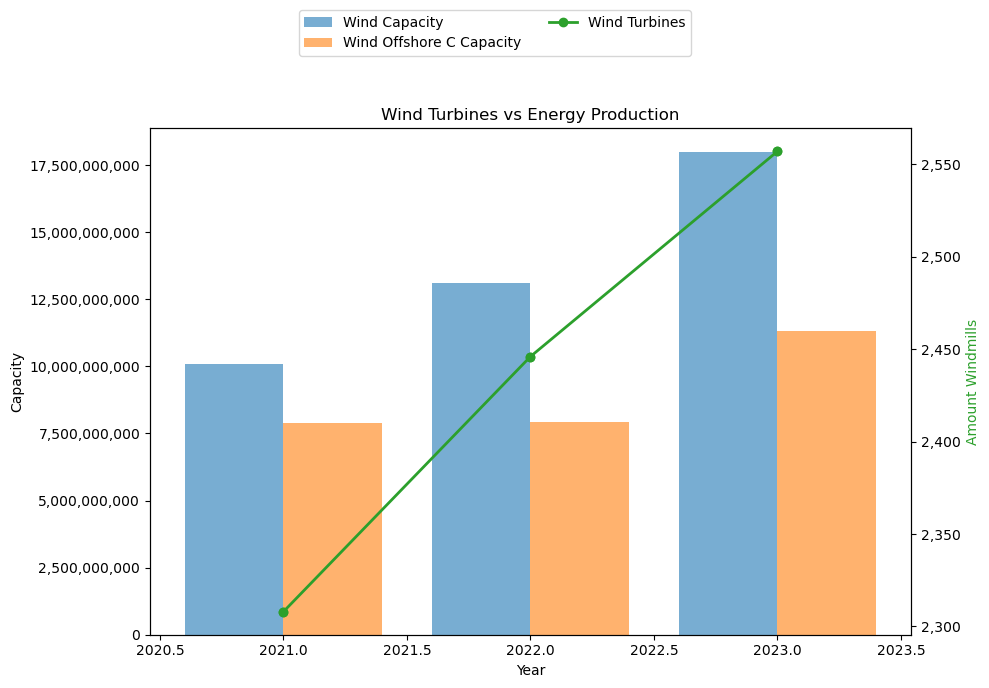

In [348]:
# Unstack the data for plotting
df_unstacked = df.pivot(index='year', columns='type', values='capacity')

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for Capacity (MW) with adjacent bars
width = 0.4  # Width of each bar
ax1.bar(df_unstacked.index - width/2, df_unstacked['Wind'], width, color='tab:blue', label='Wind Capacity', alpha=0.6)
ax1.bar(df_unstacked.index + width/2, df_unstacked['WindOffshoreC'], width, color='tab:orange', label='Wind Offshore C Capacity', alpha=0.6)

ax1.set_xlabel('Year')
ax1.set_ylabel('Capacity')

ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

ax2 = ax1.twinx()
ax2.plot(df['year'], df['Wind Turbines'], color='tab:green', marker='o', linewidth=2, label='Wind Turbines')
ax2.set_ylabel('Amount Windmills', color='tab:green')

ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Wind Turbines vs Energy Production')

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()